In [5]:
import os
import sys

# add root directory to path for helper functions
if os.path.abspath("../") not in sys.path:
    sys.path.append(os.path.abspath("../"))

import warnings
from backtesting import Backtest, Strategy
import pandas as pd
import yfinance as yf

from helper_functions.plots_helper import plot_position

warnings.filterwarnings("ignore")

In [6]:
google_data_daily = yf.download(
    "GOOG", interval="1d", start="2023-01-01", end="2024-01-01"
)

[*********************100%***********************]  1 of 1 completed


## Buy and Hold Strategy

In [7]:
class BuyAndHold(Strategy):

    def init(self):
        self.position_df = pd.DataFrame(columns=["Date", "Position Size"])

    def next(self):
        new_row = {
            "Date": self.data.index[-1],
            "Position Size": self.position.size,
        }
        self.position_df = pd.concat(
            [self.position_df, pd.DataFrame([new_row])], ignore_index=True
        )

        if self.position.size == 0:
            self.buy()

In [8]:
bnh_bt = Backtest(google_data_daily, BuyAndHold, cash=10_000)

bnh_results = bnh_bt.run()
bnh_results.head(10)

Start                    2023-01-03 00:00:00
End                      2023-12-29 00:00:00
Duration                   360 days 00:00:00
Exposure Time [%]                       99.2
Equity Final [$]                15944.929207
Equity Peak [$]                 16186.750862
Return [%]                         59.449292
Buy & Hold Return [%]              57.112595
Return (Ann.) [%]                   60.04554
Volatility (Ann.) [%]              49.740329
dtype: object

In [9]:
bnh_bt.plot(filename="../plots/buy_and_hold.html", open_browser=False)
bnh_bt

In [10]:
bnh_results["_equity_curve"].head()

,Equity,DrawdownPct,DrawdownDuration
2023-01-03,10000.000000,0.00000,NaT
2023-01-04,10000.000000,0.00000,NaT
2023-01-05,9853.099655,0.01469,NaT
2023-01-06,10010.170448,0.00000,2 days
2023-01-09,10082.490379,0.00000,NaT


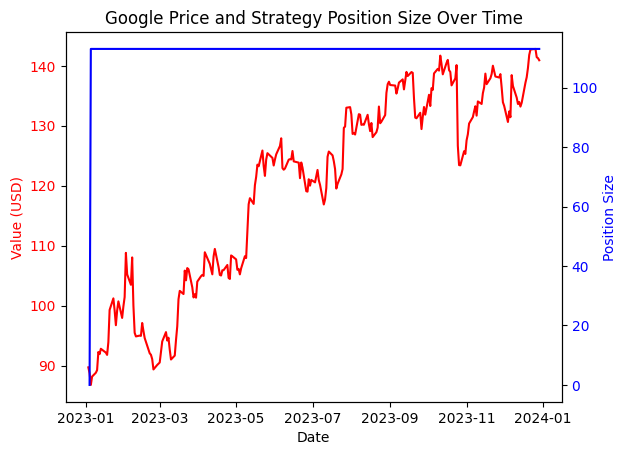

In [11]:
plot_position(
    google_data_daily["Close"],
    bnh_results._strategy.position_df.set_index("Date"),
    "Google",
)